Q1. 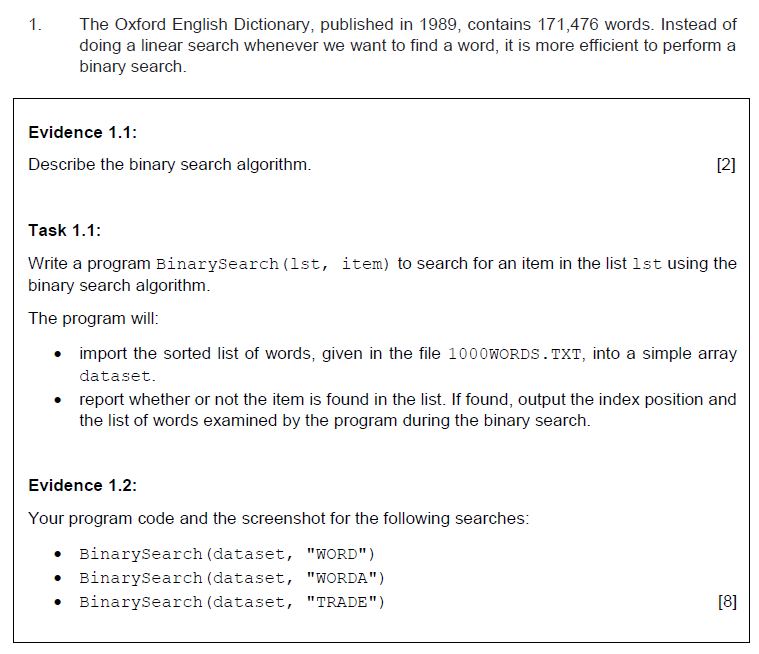

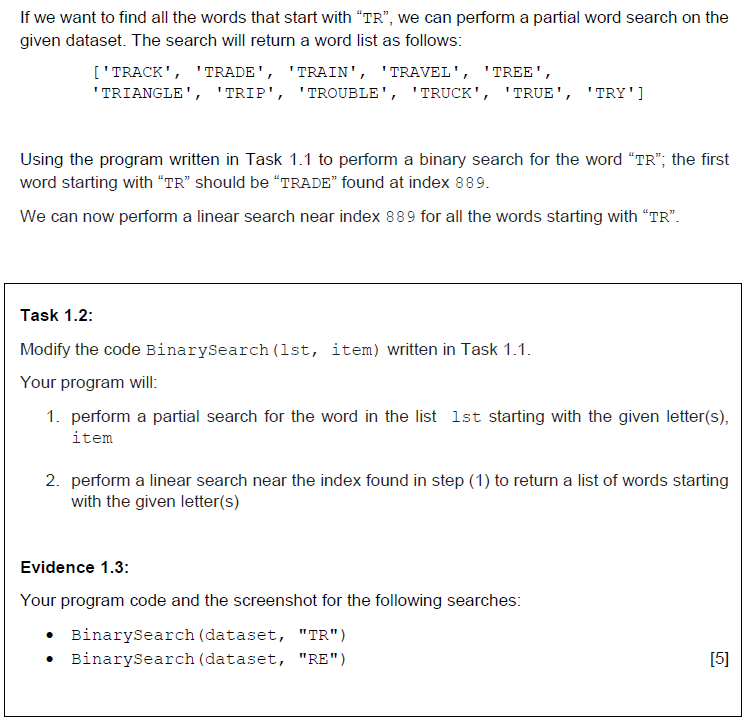

In [7]:
# Task 1.1

def BinarySearch(lst, item):
    
    wordsChecked = []
    low = 0
    high = len(lst)-1
    found = False
    
    while (not found) and (low <= high):
        mid = (low+high) // 2
        wordsChecked.append(lst[mid])
        
        if item == lst[mid]:
            found = True
        elif item < lst[mid]:
            high = mid - 1
        else:    #  item > lst[mid]
            low = mid + 1
            
    if found:
        return (mid, wordsChecked)
    else:
        return (-1, wordsChecked)
    

def main():
    
    dataset = []
    inF = open("1000words.txt", "r")
    for word in inF:
        word = word.rstrip()
        dataset.append(word)
    
    words = ["WORD", "WORDA", "TRADE"]
    for word in words:
        index, wordsChecked = BinarySearch(dataset, word)
                
        if index == -1:
            print (f"\n{word} is not found!")
        else:
            print (f"\n{word} is found at index {index}")
                   
        print ("Words examined:", end = ' ')
        for word in wordsChecked:
            print (word, end = ' ')
        print()
        
main()    



WORD is found at index 980
Words examined: LOVE SIGN TINY WAY WINGS WOULD WOMEN WORD 

WORDA is not found!
Words examined: LOVE SIGN TINY WAY WINGS WOULD WOMEN WORD WORKERS WORK 

TRADE is found at index 889
Words examined: LOVE SIGN TINY WAY UNDERLINE TRADE 


In [1]:
# Task 1.2

def BinarySearch(lst, item):
    
    n = len(item)
    low = 0
    high = len(lst)-1
    found = False
    
    while (not found) and (low <= high):
        mid = (low+high) // 2
        partialWord = lst[mid][:n]
        
        if item == partialWord:
            found = True
        elif item < partialWord:
            high = mid - 1
        else:    #  item > partialWord
            low = mid + 1
            
    if found:
        return mid
    else:
        return -1

    
def FindWords(lst, mid, item):
    
    # wordLst = []
    # wordLst.append(lst[mid]]
    
    wordLst = [lst[mid]]
    
    i = mid - 1                 # do a linear search to the left of 'mid'
    while i >= 0 and lst[i].startswith(item):
        wordLst.append(lst[i])
        i -= 1
        
    i = mid + 1                 # do a lineasr search to the right of 'mid'    
    while i < len(lst) and lst[i].startswith(item):
        wordLst.append(lst[i])
        i += 1

    return wordLst

    """
    low = mid
    high = mid 
      
    while (low-1) >= 0 and lst[low-1].startswith(item):
        low -= 1
        
    while (high+1) < len(lst) and lst[high+1].startswith(item):
        high += 1
        
    return lst[low:high+1]
    """

def main():
    dataset = []
    inF = open("1000words.txt", "r")
    for word in inF:
        word = word.rstrip()
        dataset.append(word)
    
    partialWords = ["TR", "RE"]
    for partialWord in partialWords:
        index = BinarySearch(dataset, partialWord)                
        if index == -1:
            print (f"\nNo words starting with {partialWord}")
        else:
            words = FindWords(dataset, index, partialWord)
            print (f"\nWords startng with {partialWord}:")
            for word in words:
                print (word, end = ' ')
        print()         
main()    




Words startng with TR:
TRADE TRACK TRAIN TRAVEL TREE TRIANGLE TRIP TROUBLE TRUCK TRUE TRY 

Words startng with RE:
REASON REALLY READY READ REACHED RECEIVED RECORD RED REGION REMAIN REMEMBER REPEATED REPORT REPRESENT REST RESULT RETURN 


Q2. GCE Specimen Paper Q3
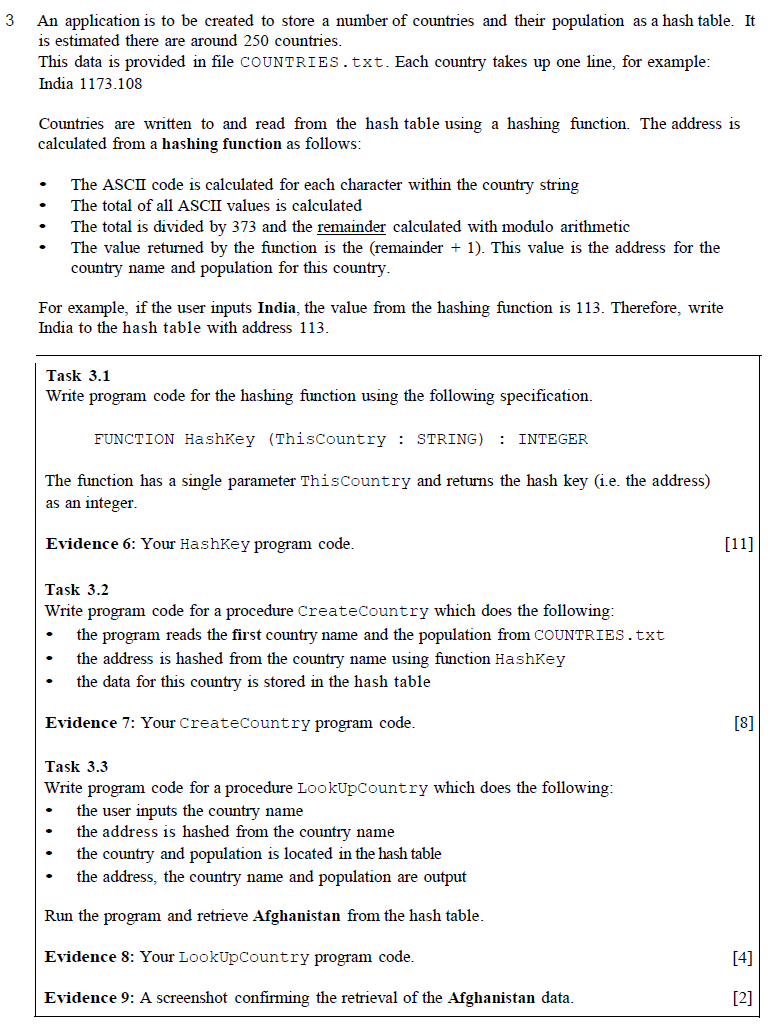

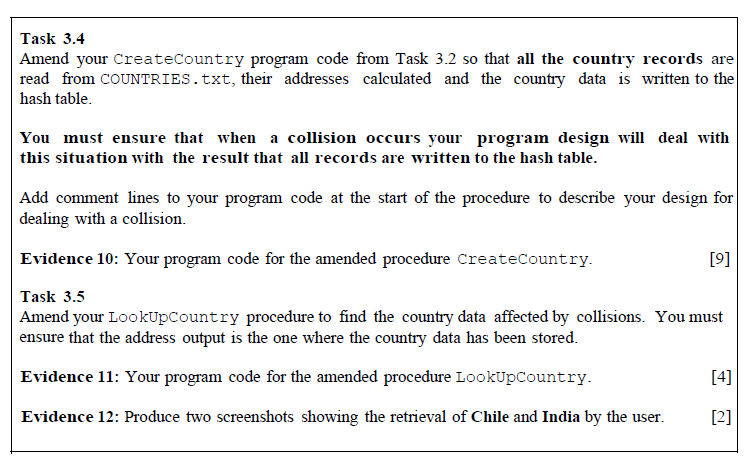

In [10]:
# 2013 GCE Specimen Paper Q3

def CreateHashTable():
    hashTable = [''] * (373+1)   
    return hashTable         

def HashKey(ThisCountry):
    total = 0
    for char in ThisCountry:
        total = total + ord(char)
    remainder = total % 373
    return (remainder+1)


def CreateCountry(hashTable):
    inFile = open("COUNTRIES.txt",'r')

    for line in inFile:
        country = line.strip()
        
        population = inFile.readline().rstrip()
        population = float(population)

        addr = HashKey(country)

        done = False      
        while not done:           
            if hashTable[addr] == '':
                hashTable[addr] = [country,population]
                done = True
            else:                    # if slot is not empty => collision 
                addr = addr + 1      # use linear probing method, advance to next address
                if addr > 373:           
                    addr = 1            # wrap around                
    inFile.close()

    
def LookUpCountry(hashTable):
    country = input("Enter country name: ")
    
    homeAddr = HashKey(country)
    print ("Hashed address: ", homeAddr)

    addr = homeAddr
    found = False
    
    while hashTable[addr]!= '' and not found:        
        storedCountry, storedPopulation = hashTable[addr]          
  
        if storedCountry == country:   # match with the country required
            found = True
        else:                          # country not match, advance to next address
            addr = addr + 1
            if addr > 373:             # wrap around
                addr = 1
    if found:
        print ("\nCountry:", storedCountry)
        print ("Address:", addr)
        print ("Population:", storedPopulation)
    else:        # hashTable[addr] == ''
        print (country, "not found")

def main():
    hashTable = CreateHashTable() 
    CreateCountry(hashTable)
    LookUpCountry(hashTable)

main()



Enter country name: India
Hashed address:  113

Country: India
Address: 114
Population: 1173.108


Q3. 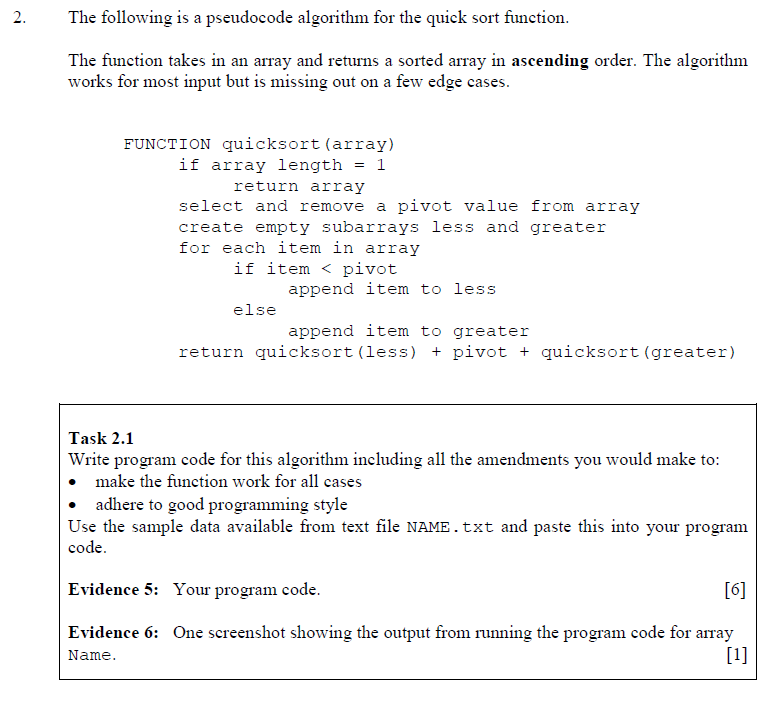

In [13]:
def quicksort(array):
    # arrays of length 0 and 1 do not require sorting
    if len(array) == 0 or len(array) == 1:
        return array

    # select and remove pivot value (last value)
    pivot = array.pop()

    # create empty subarrays less and greater
    less = []
    greater = []

    # append each item into appropriate subarray
    for item in array:
        if item < pivot:
            less.append(item)
        else:
            greater.append(item)

    return quicksort(less) + [pivot] + quicksort(greater)

                        
def printItems(array):
    for item in array:
        print (item, end = '  ')
    print ()

        
def main():

    Name = ['']*13
    
    Name[1] = "KEN"
    Name[2] = "BEN"
    Name[3] = "GLENN"
    Name[4] = "DON"
    Name[5] = "JULIE"
    Name[6] = "FENN"
    Name[7] = "ALI"
    Name[8] = "LINNA"
    Name[9] = "IAN"
    Name[10] = "ELICE"
    Name[11] = "HELEN"
    Name[12] = "CHARLIE"

    Name = Name[1:]   # remove Name[0] => Name = ["Ken', 'Ben', .. ., 'Charlie']
    
    print ('\nUnsorted list:')
    printItems(Name)
 
    sortedItems = quicksort(Name)

    print ('\nSorted list:')
    printItems(sortedItems)

main()


Unsorted list:
KEN  BEN  GLENN  DON  JULIE  FENN  ALI  LINNA  IAN  ELICE  HELEN  CHARLIE  

Sorted list:
ALI  BEN  CHARLIE  DON  ELICE  FENN  GLENN  HELEN  IAN  JULIE  KEN  LINNA  
